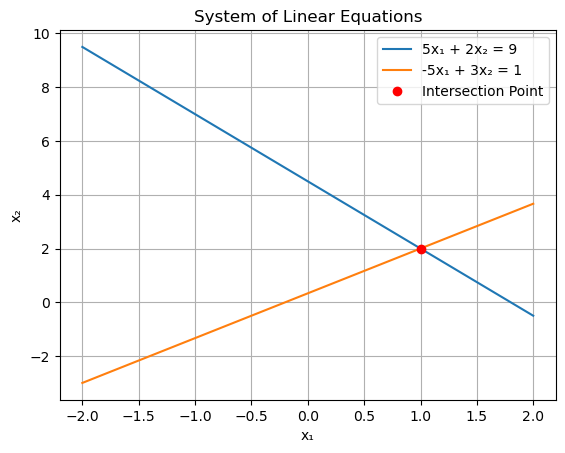

In [1]:
#문제1

#1 해당 문제의 연립방정식의 det값은 0이 아님으로 역행렬이 존재. 즉 두 직선은 하나의 교점을 가진다. 식을 풀면 (x1, x2) = (1,2)가 두 식의 교점이 된다.

import matplotlib.pyplot as plt
import numpy as np

def func1(x1): #x2 = f(x1)꼴. 이하 동일
  return (9 - 5 * x1) / 2

def func2(x1):
  return (1 + 5 * x1) / 3

x1 = np.linspace(-2, 2, 100)
y1 = func1(x1)
y2 = func2(x1)

plt.plot(x1, y1, label='5x₁ + 2x₂ = 9')
plt.plot(x1, y2, label='-5x₁ + 3x₂ = 1')
plt.plot(1, 2, 'ro', label='Intersection Point')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('System of Linear Equations')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#문제2

import cv2
import numpy as np

#병진

img_src = cv2.imread(r"img\lycoreco2.jpg", cv2.IMREAD_COLOR)

#스케일링 (s)
height, width = img_src.shape[:2]

M1 = np.array([[1, 0, 150], [0, 1, 50]], dtype=float)
dst_1 = cv2.warpAffine(img_src, M1, (width, height))
result1 = cv2.hconcat([img_src, dst_1])
cv2.imshow("result1", result1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#문제3

import cv2
import numpy as np

img_src = cv2.imread(r"img\lycoreco2.jpg", cv2.IMREAD_COLOR)
img_dst = np.zeros_like(img_src)

img_tmp = cv2.resize(img_src, dsize=(0,0),fx=0.7, fy=0.3, interpolation=cv2.INTER_LINEAR) #이미지 사이즈 조절 함수
h,w = img_tmp.shape[:2] #(resize된)img_tmp의 가로 세로 비율 추출
img_dst[:h,:w,:] = img_tmp #마지막에 빈 인자(:)는 칼라여부. 지금은 칼라 다 넣을거라 빈인자로
img_dst = cv2.hconcat([img_src,img_dst]) # 원래 이미지(img_src)와 변형된 이미지(검정배경 위의 이미지)를 가로로 배열해
cv2.imshow('lyco', img_dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#문제3 (문제 출력형태가 바뀌어 버림. 이미지는 리코리스 말고 히사메로)

import cv2
import numpy as np

# 이미지 읽어오기
img_src = cv2.imread(r"img\lycoreco2.jpg", cv2.IMREAD_COLOR)

# 원본 이미지 크기 조절 비율
resize_ratio = 0.5
h_src, w_src = img_src.shape[:2]
img_src_resized = cv2.resize(img_src, (int(w_src * resize_ratio), int(h_src * resize_ratio)), interpolation=cv2.INTER_LINEAR)

# 70% 및 30% 크기로 이미지 크기 조절
img_70 = cv2.resize(img_src_resized, (0, 0), fx=0.7, fy=0.7, interpolation=cv2.INTER_LINEAR)
img_30 = cv2.resize(img_src_resized, (0, 0), fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)

# img_src_resized 와 같은 크기의 검은 배경 생성
h_resized, w_resized = img_src_resized.shape[:2]
img_dst1 = np.zeros_like(img_src_resized)
img_dst2 = np.zeros_like(img_src_resized)

# 70% 이미지를 왼쪽 상단에 배치
h_70, w_70 = img_70.shape[:2]
img_dst1[:h_70, :w_70] = img_70

# 30% 이미지를 왼쪽 상단에 배치
h_30, w_30 = img_30.shape[:2]
img_dst2[:h_30, :w_30] = img_30


# 세 이미지를 수평으로 연결
img_dst = cv2.hconcat([img_src_resized, img_dst1, img_dst2])

cv2.imshow('lyco', img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
#문제4

import cv2
import numpy as np

img_src = cv2.imread(r"img\lycoreco2.jpg", cv2.IMREAD_COLOR)  # 이미지 경로 수정 필요

height, width = img_src.shape[:2]
angles = [60, 120, 180, 240, 300]
rotated_images = []

for angle in angles:
    center = (height // 2, width // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_img = cv2.warpAffine(img_src, rotation_matrix, (width, height))
    rotated_images.append(rotated_img)

# 2x3 그리드로 이미지 배열
row1 = cv2.hconcat([img_src, rotated_images[0], rotated_images[1]])
row2 = cv2.hconcat([rotated_images[2], rotated_images[3], rotated_images[4]]) # 마지막은 원본 이미지


img_dst = cv2.vconcat([row1, row2])

cv2.imshow('Rotated Images', img_dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [2]:
#문제5

import cv2
import numpy as np

img_src = cv2.imread(r"img\hisame.jpg", cv2.IMREAD_COLOR)

# 스케일링 (s)
height, width = img_src.shape[:2]
img_zero = np.zeros_like(img_src)  # 검정이미지
img_s1 = cv2.resize(img_src, dsize=(0, 0), fx=0.7, fy=0.7, interpolation=cv2.INTER_LINEAR)
h7, w7 = img_s1.shape[:2]
img_zero[:h7, :w7, :] = img_s1  # zero(검정이미지)위에 s1이미지

# 병진 (t가 가해져 ts)  15% 이동으로 변경
w_move = int(width * 0.15)  # 원본 이미지 너비의 15%
h_move = int(height * 0.15) # 원본 이미지 높이의 15%
M2 = np.array([[1, 0, w_move], [0, 1, h_move]], dtype=float)
img_ts = cv2.warpAffine(img_zero, M2, (width, height))

# 회전 (r이 가해져 rts)
angle = 45
center = (height // 2, width // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
img_rts = cv2.warpAffine(img_ts, rotation_matrix, (width, height))

# 원본 이미지와 변환된 이미지 붙이기
img_dst1 = cv2.hconcat([img_src, img_zero])
img_dst2 = cv2.hconcat([img_ts, img_rts])
img_dst = cv2.vconcat([img_dst1, img_dst2])

# 이미지 표시
cv2.imshow('lycoris', img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (900839932.py, line 9)

In [3]:
import cv2
import numpy as np

img_src = cv2.imread(r"img\hisame.jpg", cv2.IMREAD_COLOR)

# Resize the original image to 70%
height_orig, width_orig = img_src.shape[:2]
img_src_resized = cv2.resize(img_src, dsize=(0, 0), fx=0.7, fy=0.7, interpolation=cv2.INTER_LINEAR)

# 스케일링 (s)
height, width = img_src_resized.shape[:2] # Use the resized dimensions
img_zero = np.zeros_like(img_src_resized)  # 검정이미지 with resized dimensions
img_s1 = cv2.resize(img_src_resized, dsize=(0, 0), fx=0.7, fy=0.7, interpolation=cv2.INTER_LINEAR) #Redundant resizing.  Remove this line
h7, w7 = img_s1.shape[:2]
img_zero[:h7, :w7, :] = img_s1  # zero(검정이미지)위에 s1이미지

# 병진 (t가 가해져 ts)  15% 이동으로 변경
w_move = int(width * 0.15)  # 원본 이미지 너비의 15% (now based on resized image)
h_move = int(height * 0.15) # 원본 이미지 높이의 15% (now based on resized image)
M2 = np.array([[1, 0, w_move], [0, 1, h_move]], dtype=float)
img_ts = cv2.warpAffine(img_zero, M2, (width, height))

# 회전 (r이 가해져 rts)
angle = 45
center = (height // 2, width // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
img_rts = cv2.warpAffine(img_ts, rotation_matrix, (width, height))

# 원본 이미지와 변환된 이미지 붙이기
img_dst1 = cv2.hconcat([img_src_resized, img_zero]) # Use resized original
img_dst2 = cv2.hconcat([img_ts, img_rts])
img_dst = cv2.vconcat([img_dst1, img_dst2])

# 이미지 표시
cv2.imshow('lycoris', img_dst)
cv2.waitKey()
cv2.destroyAllWindows()